# Métodos numéricos para la valoración de opciones

In [1]:
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(123)

**Simulación de trayectoria**

In [2]:
# Parametros
N = 200
dt = 1/250
mu = 0.5
sg = 0.3
B = np.zeros(N)
# Condicion inicial
X0 = 10

In [3]:
B[0] = 0
for i in range(1,N):
    B[i] = B[i-1] - np.sqrt(dt)*np.random.normal()
X = np.zeros(N)
X[0] = X0
for i in range(1,N):
    X[i] = X[i-1] + mu*X[i-1]*dt + sg*X[i-1]*(B[i] - B[i-1])

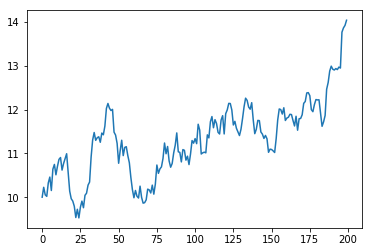

In [4]:
plt.plot(X)
plt.show()

In [5]:
R = np.zeros(N)
# Retornos instantáneos
for j in range(1,N):
        R[j-1] = (X[j] - X[j-1])/X[j-1]
    #ri = mudti + sigmadbi

In [6]:
dt = 1/len(R)
media = np.mean(R)
varianza = np.var(R)
mu = media/dt
sigma = np.sqrt(varianza/dt)
print('mu: '+str(mu)+'\n'+'sigma: '+str(sigma))

mu: 0.37949503253792766
sigma: 0.28235879979836037


**Precio de ejercicio**

In [7]:
k = 10000 # Numero de trayectorias
T = 1 # Periodo de maduración
dt = 1/250
N = 200 # Numero de observaciones
S = np.zeros((k,N))
for i in range(k):
    S[i,0] = X[-1]
for i in range(k):
    for j in range(1,N):
        S[i,j] = S[i, j-1] + mu*S[i, j-1]*dt + sigma*S[i,j-1]*np.sqrt(dt)*np.random.normal()

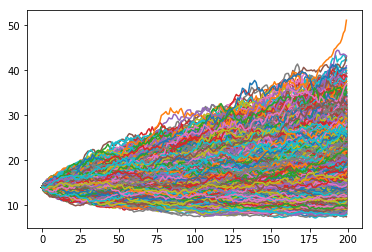

In [8]:
plt.plot(np.matrix(S).T)
plt.show()

In [9]:
K = 15 # Precio de ejercicio

## Fórmula de Black-Scholes

In [10]:
sigma = 0.3
r = 0.05 # La tasa de interes libre de riesgo
S0 = X[-1]
T = 1
d1 = (np.log(S0/K) + (r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
d2 = d1 - sigma*np.sqrt(T)

In [11]:
import scipy.stats as ss
N = ss.norm(0,1)
fcall = S0*N.cdf(d1) - K*np.exp(-r*T)*N.cdf(d2)
print('fcall:', fcall)

fcall: 1.5768291536250585


## Simulación Montecarlo

In [12]:
def opcion(x):
    for i in range(10000):
        for j in range(1,200):
            S[i,j] = S[i, j-1] + r*S[i, j-1]*dt + sigma*S[i,j-1]*np.sqrt(dt)*np.random.normal()
    pa = np.zeros(k)
    for i in range(k):
        pa[i] = np.maximum(S[i,-1]-K,0)
    media = np.mean(pa)
    opcion = np.exp(-r*T)*media
    return opcion

In [14]:
from multiprocessing import Pool
p = Pool(100)
yy = p.map(opcion, range(1000))

In [15]:
yy = np.array(yy)
print('media:', np.mean(yy))
print('Minimo:', np.min(yy))
print('Maximo:', np.max(yy))

media: 1.3270279143686572
Minimo: 1.2871650658679152
Maximo: 1.3744396847647848


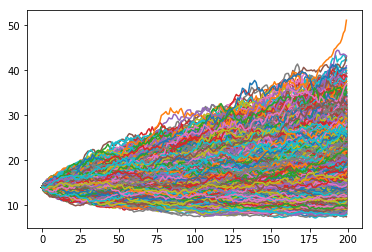

In [16]:
plt.plot(np.matrix(S).T)
plt.show()

## Árboles binomiales

In [17]:
n = 50
dt = T/n
u = np.exp(sigma*np.sqrt(dt)) # Proporción de subida
d = 1/u # Proporción de bajada
p = (np.exp(r*dt)-d)/(u-d) # Probabilidad de salto

In [18]:
A = np.zeros((n+1,n+1))
A[0,0] = S0

In [19]:
for i in range(1,n+1):
    for j in range(i+1):
        A[i,j] = S0*(u**(i-j))*(d**j)

In [20]:
f = np.zeros_like(A)
for j in range(n+1):
    a = np.maximum(S0*(u**(n-j))*(d**(j)) - K,0)
    f[n,j] = a

In [21]:
for i in range(n-1,-1,-1):
    for j in range(i+1):
        f[i,j] = np.exp(-r*dt)*((1-p)*f[i+1,j+1] + (p)*f[i+1,j])

In [22]:
print('opcion', f[0,0])

opcion 1.5794197586384555
